Importação de todas as bibliotecas necessárias.

In [1]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [ ]:
Carregamento da base de dados.

In [3]:
(X_treinamento, y_treinamento) , (X_teste, y_teste) = mnist.load_data()

In [4]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_treinamento, X_treinamento.max()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

Mostra o array de respostas.

In [6]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Plot da imagem do treinamento 0

Text(0.5, 1.0, 'Classe [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

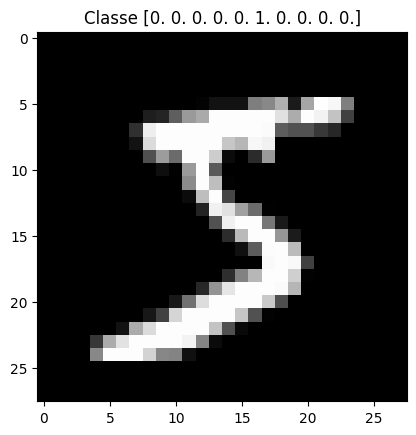

In [23]:
plt.imshow(X_treinamento[0], cmap='gray')
plt.title("Classe " + str(y_treinamento[0]))

Reformando o treinamento para adicionarmos mais uma dimensão, para um canal de cores só

In [8]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28,28,1)

In [9]:
X_teste = X_teste.reshape(X_teste.shape[0], 28,28,1)

In [10]:
X_treinamento = X_treinamento.astype("float32")

In [12]:
X_teste = X_teste.astype("float32")

Colocando todos eles entre apenas 0 e 1

In [13]:
X_treinamento /= 255
X_teste /= 255

In [14]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [15]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Alterando o y_treinamento e y_teste para que fique um array codificado do que apenas o numero inteiro

In [16]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [17]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Criação da rede neural seu formato e suas funções de ativação

In [28]:
rede_neural = Sequential()
rede_neural.add(InputLayer(shape = [28,28,1])) #camada de entrada

#Primeiro bloco de convolução e max pooling
rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size = (2,2)))

#segundo
rede_neural.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size = (2,2)))

rede_neural.add(Flatten())

#primeira camada oculta
rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dropout(0.2))

#segunda
rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dropout(0.2))

#camad de saída
rede_neural.add(Dense(units = 10, activation = 'softmax'))

In [29]:
rede_neural.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

Compilamento da rede neural utilizando qual vai ser a métrica de perda e o otimizador dela

In [30]:
rede_neural.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Treinamento da rede neural utilizando 5 epocas e 128 imagens de uma vez

In [31]:
rede_neural.fit(
    X_treinamento, y_treinamento,
    batch_size=128,
    epochs=5,
    validation_data=(X_teste, y_teste)
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.8552 - loss: 0.4589 - val_accuracy: 0.9586 - val_loss: 0.1450
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 65ms/step - accuracy: 0.9789 - loss: 0.0712 - val_accuracy: 0.9849 - val_loss: 0.0515
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9855 - loss: 0.0490 - val_accuracy: 0.9864 - val_loss: 0.0449
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.9891 - loss: 0.0351 - val_accuracy: 0.9891 - val_loss: 0.0342
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 71ms/step - accuracy: 0.9896 - loss: 0.0338 - val_accuracy: 0.9882 - val_loss: 0.0402


In [33]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9844 - loss: 0.0516


Resultado da rede nerual, o primeiro é o erro, e o segundo é o acerto.

In [27]:
resultado

[0.04370734468102455, 0.98580002784729]

Praticamente os mesmos resultados, mostrando que nem sempre uma rede neural mais complexa significa resultados melhores.

In [34]:
resultado

[0.0402161180973053, 0.9882000088691711]